In [1]:
import pandas as pd
df = pd.read_csv('bank_balanced.csv')
print(df.shape)
print(df.info())
df.head()

(10578, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10578 non-null  int64 
 1   job        10578 non-null  object
 2   marital    10578 non-null  object
 3   education  10578 non-null  object
 4   default    10578 non-null  object
 5   balance    10578 non-null  int64 
 6   housing    10578 non-null  object
 7   loan       10578 non-null  object
 8   contact    10578 non-null  object
 9   day        10578 non-null  int64 
 10  month      10578 non-null  object
 11  duration   10578 non-null  int64 
 12  y          10578 non-null  object
dtypes: int64(4), object(9)
memory usage: 1.0+ MB
None


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,y
0,25,student,single,unknown,no,480,no,no,cellular,8,sep,140,yes
1,28,services,married,secondary,no,510,yes,yes,cellular,8,jul,1767,yes
2,39,management,single,tertiary,no,0,yes,no,cellular,22,may,271,yes
3,45,housemaid,married,secondary,no,360,no,no,cellular,3,nov,215,yes
4,53,retired,married,tertiary,no,1691,no,no,unknown,13,may,916,no


In [2]:

df["y"].value_counts()

no     5289
yes    5289
Name: y, dtype: int64

In [3]:
df["y"].value_counts()/len(df.y)

no     0.5
yes    0.5
Name: y, dtype: float64

In [4]:
df = df.drop(['duration'], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,y
0,25,student,single,unknown,no,480,no,no,cellular,8,sep,yes
1,28,services,married,secondary,no,510,yes,yes,cellular,8,jul,yes
2,39,management,single,tertiary,no,0,yes,no,cellular,22,may,yes
3,45,housemaid,married,secondary,no,360,no,no,cellular,3,nov,yes
4,53,retired,married,tertiary,no,1691,no,no,unknown,13,may,no


In [5]:
cat_cols = ['job','marital','education','loan','contact','month','day',"default" ,'housing' ]

for col in cat_cols:
    df = df.join(pd.get_dummies(df[col],prefix = col))

keep = [col for col in df.columns if col not in cat_cols]
df = df [keep]

In [6]:
df["y"]=df.y.astype('category')
df["y"]=df["y"].cat.codes

In [7]:
df.columns

Index(['age', 'balance', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20',
       'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27',
       'day_28', 'day_29', 'day_30',

In [8]:
df.y.head()

0    1
1    1
2    1
3    1
4    0
Name: y, dtype: int8

In [9]:
cols = df.columns.values.tolist()
y=df['y']
X = df[[col for col in cols if col !="y"]]
X.shape ,y.shape

((10578, 73), (10578,))

In [14]:
df_y = pd.DataFrame(df['y'])
df_x = df[['y']]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_x,df_y, test_size=0.2,random_state=42)

In [16]:
X_train.head()

,y
9342,0
4001,1
334,1
1613,0
4328,1


In [17]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=100256)

clf = clf.fit(X_train,y_train)

[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.5\nsamples = 8462\nvalue = [4212, 4250]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 4212\nvalue = [4212, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 4250\nvalue = [0, 4250]')]

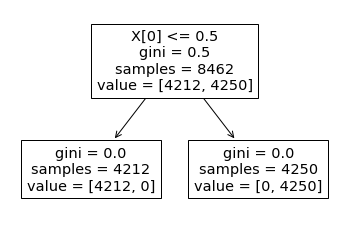

In [18]:
tree.plot_tree(clf)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix

y_train_pred = clf.predict(X_train)
train_acc = accuracy_score(y_train,y_train_pred)
print('Train Accuracy:',round(train_acc * 100,2))

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print('Accuracy:',round(acc*100,2))
print('Confusion Matrix:')
print(cm)

Train Accuracy: 100.0
Accuracy: 100.0
Confusion Matrix:
[[1077    0]
 [   0 1039]]


In [20]:
X_train.head()

,y
9342,0
4001,1
334,1
1613,0
4328,1


In [21]:
y_train.head()

,y
9342,0
4001,1
334,1
1613,0
4328,1


In [22]:
from sklearn.model_selection import GridSearchCV

# This is not good. Let's see if it can be improved using cross validation.
param_dict = {'criterion':['gini','entropy'],
              'max_depth':range(1,10), # How deep the tree can go
              'min_samples_split':range(1,10), # min number of samples needed to split
              'min_samples_leaf':range(1,5)} # min number of samples should reach a leaf

# What is the mode to do cross validation
clf_CV = tree.DecisionTreeClassifier(random_state=42)
# create the grid search
grid = GridSearchCV(clf_CV,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)
# search the grid
grid.fit(X_train,y_train)

# Get the best model that we could find
best_clf = grid.best_estimator_

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


/Users/shrijanakwade/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan  1.  1.  1.  1.  1.  1.  1.  1. nan  1.  1.  1.  1.  1.  1.  1.  1.
 nan  1.  1.  1.  1.  1.  1.  1.  1. nan  1.  1.  1.  1.  1.  1.  1.  1.
 nan  1.  1.  1.  1.  1.  1.  1.  1. nan  1.  1.  1.  1.  1.  1.  1.  1.
 nan  1.  1.  1.  1.  1.  1.  1.  1. nan  1.  1.  1.  1.  1.  1.  1.  1.
 nan  1.  1.  1.  1.  1.  1.  1.  1. nan  1.  1.  1.  1.  1.  1.  1.  1.
 nan  1.  1.  1.  1.  1.  1.  1.  1. nan  1.  1.  1.  1.  1.  1.  1.  1.
 nan  1.  1.  1.  1.  1.  1.  1.  1. nan  1.  1.  1.  1.  1.  1.  1.  1.
 nan  1.  1.  1.  1.  1.  1.  1.  1. nan  1.  1.  1.  1.  1.  1.  1.  1.
 nan  1.  1.  1.  1.  1.  1.  1.  1. nan  1.  1.  1.  1.  1.  1.  1.  1.
 nan  1.  1.  1.  1.  1.  1.  1.  1. nan  1.  1.  1.  1.  1.  1.  1.  1.
 nan  1.  1.  1.  1.  1.  1.  1.  1. nan  1.  1.  1.  1.  1.  1.  1.  1.
 nan  1.  1.  1.  1.  1.  1.  1.  

In [23]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [24]:

y_train_pred = best_clf.predict(X_train)
train_acc = accuracy_score(y_train,y_train_pred)
print('Train Accuracy:',round(train_acc * 100,2))

y_pred = best_clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print('Accuracy:',round(acc*100,2))
print('Confusion Matrix:')
print(cm)

Train Accuracy: 100.0
Accuracy: 100.0
Confusion Matrix:
[[1077    0]
 [   0 1039]]


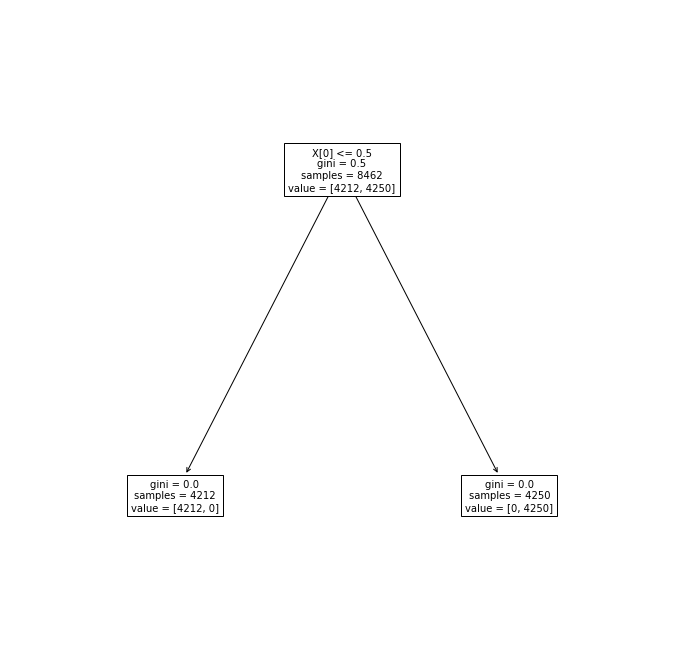

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(best_clf, fontsize=10)
plt.show()